**Jonna Sosa**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 2b: 3D Scatter Plots and Rotation Matrices
## Task 1: Setup, Data Import and 3D Scatter Plots

### 1a) Setup
1. Import numpy
2. Import matplotlib.pyplot

In [1]:
# Header

import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams['font.size'] = 15
plt.rcParams["figure.figsize"] = [8,4.5]

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

### 1b) Import the Data
1. Read the 3-dimensional toy dataset in 'data/gauss_3d.csv' into a numpy matrix with 3 columns (X, Y, and Z). [numpy.genfromtxt](https://numpy.org/doc/1.18/reference/generated/numpy.genfromtxt.html)
2. Print the ndarray.

In [2]:
Lab02 = np.genfromtxt('data/gauss_3d.csv', delimiter=',')
Lab02 = np.array(Lab02)

## Task 2: 3D graphing

- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
- [MatPlotLib mplot3d demo](https://matplotlib.org/examples/mplot3d/scatter3d_demo.html)

#### Using the above links and MatPlotLib documentation to complete the following tasks:

Visualize the dataset with Matplotlib. All charts must include a title and axis labels.

1. Create a 3D Cartesian figure using the columns as labeled. 
2. Use dots instead of a solid line.

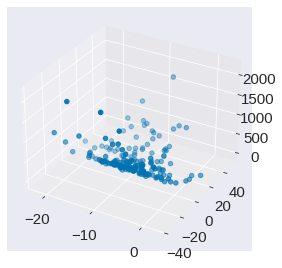

In [4]:
#%matplotlib notebook
#from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

zdata = Lab02[:,2]
xdata = Lab02[:,0]
ydata = Lab02[:,1]

ax.scatter3D(xdata, ydata, zdata);
plt.show()


## Task 2: Rotation

### 2a) Prepare data for transformation matrices
We need to add a column of 1s to our dataset.
1. Create a matrix of ones of the correct dimensions. [numpy.ones](hhttps://numpy.org/doc/1.18/reference/generated/numpy.ones.html)
2. Add the new column to the imported data. [numpy.hstack](https://numpy.org/doc/1.18/reference/generated/numpy.hstack.html)


In [6]:
d = Lab02
row, col= np.shape(d)
one = np.ones(row)

homo = np.c_[d,one]
print (homo)

[[  -1.878   -1.013   73.627    1.   ]
 [ -13.059   17.36    41.08     1.   ]
 [ -12.641   -3.435  174.669    1.   ]
 [ -15.365   34.323  607.439    1.   ]
 [  -5.673  -14.979  598.393    1.   ]
 [ -21.508  -21.41   973.77     1.   ]
 [  -1.276  -19.761  817.145    1.   ]
 [ -13.806   -8.358  301.274    1.   ]
 [  -8.405  -11.787  470.952    1.   ]
 [ -11.247   34.341  605.098    1.   ]
 [  -2.689    0.103   75.917    1.   ]
 [ -20.301  -15.14   668.435    1.   ]
 [ -11.612   21.716  166.265    1.   ]
 [ -11.92    -3.798  173.865    1.   ]
 [  -4.331  -13.553  479.397    1.   ]
 [ -15.499   18.138    6.781    1.   ]
 [ -10.862   14.35   -15.52     1.   ]
 [ -14.389   -1.524  145.707    1.   ]
 [  -9.789   26.113  252.389    1.   ]
 [  -7.086    6.937  -57.971    1.   ]
 [ -15.503   29.254  350.007    1.   ]
 [  -4.276   12.541   31.791    1.   ]
 [  -5.492   28.382  313.531    1.   ]
 [  -7.488    6.641  -22.467    1.   ]
 [  -5.496  -13.296  579.077    1.   ]
 [ -13.419   41.741  993.

<img src="img/Rotation-Matrix.png" align="right" width="200"/>

### 2b) Design a rotation matrix

1. Design a transformation matrix that rotates the dataset 30 degrees about the Y axis
  - Identity Matrix: [eye](https://numpy.org/doc/1.18/reference/generated/numpy.eye.html)
  - [Trigonometric functions](https://numpy.org/doc/1.18/reference/routines.math.html)
  - Print your matrix


In [7]:
ind = 1
degrees = 30
        
if ind == 0:
    rot = np.eye(4)
    rot[1, 1] = np.cos(degrees)
    rot[1, 2] = -np.sin(degrees)
    rot[2, 2] = np.cos(degrees)
    rot[2, 1] = np.sin(degrees)
    print(rot)
elif ind == 1:
    rot = np.eye(4)
    rot[0, 0] = np.cos(degrees)
    rot[0, 2] = np.sin(degrees)
    rot[2, 2] = np.cos(degrees)
    rot[2, 0] = -np.sin(degrees)
    print(rot)
elif ind == 2:
    rot = np.eye(4)
    rot[0, 0] = np.cos(degrees)
    rot[1, 0] = np.sin(degrees)
    rot[1, 1] = np.cos(degrees)
    rot[0, 1] = -np.sin(degrees)
    print(rot)

[[ 0.15425  0.      -0.98803  0.     ]
 [ 0.       1.       0.       0.     ]
 [ 0.98803  0.       0.15425  0.     ]
 [ 0.       0.       0.       1.     ]]


### 2c) Rotate data and Visualize Results in 2D

2. Multiply your transformation matrix with the dataset using matrix multiplication and transposed matrices
  - m @ n or [matmul](https://numpy.org/doc/1.18/reference/generated/numpy.matmul.html) 
  - [transpose](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T)
3. Create a figure with 3 subplots, graph the original data and rotated results for all 3 possible pairs of axes. Each subplot should have 2 datasets graphed on it, the original data and the rotated data in different colors.
  - <i>If you implemented a function in the previous lab, you can use it here.</i>
  - Each subplot should have a title
  - The plot should include a legend labeling which color is which dataset.

[[  -73.03549    -1.013       9.50155]
 [  -42.60271    17.36       -6.56606]
 [ -174.52839    -3.435      14.45324]
 [ -602.53902    34.323      78.51724]
 [ -592.10628   -14.979      86.69788]
 [ -965.43319   -21.41      128.95485]
 [ -807.56193   -19.761     124.78507]
 [ -299.79784    -8.358      32.83119]
 [ -466.61195   -11.787      64.34062]
 [ -599.59083    34.341      82.22485]
 [  -75.42318     0.103       9.05349]
 [ -663.56638   -15.14       83.04904]
 [ -166.06625    21.716      14.17359]
 [ -173.6228     -3.798      15.04159]
 [ -474.32746   -13.553      69.66852]
 [   -9.09059    18.138     -14.26752]
 [   13.65877    14.35      -13.12598]
 [ -146.18265    -1.524       8.25873]
 [ -250.87828    26.113      29.25953]
 [   56.18416     6.937     -15.9433 ]
 [ -348.20934    29.254      38.67163]
 [  -32.07009    12.541       0.67898]
 [ -310.62569    28.382      42.93634]
 [   21.04307     6.641     -10.86395]
 [ -572.99415   -13.296      83.89325]
 [ -983.97178    41.741  

<Figure size 576x324 with 0 Axes>

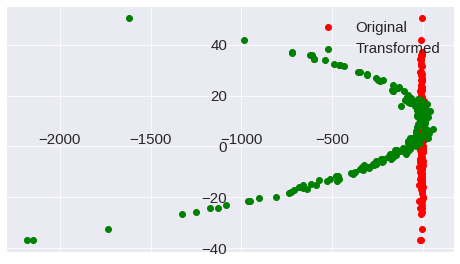

<Figure size 576x324 with 0 Axes>

In [8]:
dsTransformed = (rot@homo.T).T
dsTransformed = np.delete(dsTransformed, -1, axis=1)
        
print(dsTransformed)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.scatter(Lab02[:,0],Lab02[:,1], c = 'r', label='Original')
plt.scatter(dsTransformed[:,0],dsTransformed[:,1], c = 'g', label='Transformed')


plt.legend(loc='upper right')

plt.figure()

### 2d) Visualize Rotated Data in 3D

- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib mplot3d](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)
- [MatPlotLib mplot3d demo](https://matplotlib.org/examples/mplot3d/scatter3d_demo.html)

#### Using the above links and MatPlotLib documentation to complete the following tasks:

Visualize the dataset with Matplotlib. All charts must include a title and axis labels.

1. Create a 3D Cartesian figure using the columns as labeled.  
2. Use dots instead of a solid line.
3. Graph the original dataset and rotated dataset on the same graph.

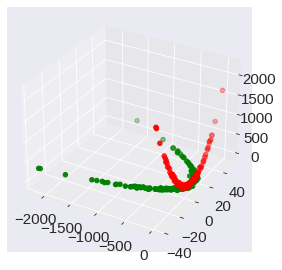

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

zdata = Lab02[:,2]
xdata = Lab02[:,0]
ydata = Lab02[:,1]

x = dsTransformed[:,0]
y = dsTransformed[:,1]
z = dsTransformed[:,2]

ax.scatter3D(xdata, ydata, zdata, c = 'r', label='Original');
ax.scatter3D(x, y, z, c = 'g', label='transformed');
plt.show()